<a href="https://colab.research.google.com/github/mahiidharv/Demonstration-of-Different-Optimizers-on-Autoencoders/blob/master/Demonstration_of_Optimizers_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
#os.listdir()

In [0]:
os.chdir("/content/drive/My Drive/Demonstration_of_Optimizers_in_Keras")

In [88]:
!pip install tensorflow==1.15.0

In [0]:
from keras.datasets import mnist
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize the data between 0 and 1



In [0]:
x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.


In [93]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Flatten the 28x28 images into vectors of size 784.

In [0]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [95]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#### Encoder of the Network with Fullly Connected rows using Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
input_dim = x_train.shape[1]

In [0]:
encoding_dim = 32

#### Encoder Decoder Network

[link text](https://localhost:8891/view/img/autoencoder_schema.jpg)

In [0]:
input_img = Input(shape=(input_dim,))

In [100]:
input_img.shape

TensorShape([Dimension(None), Dimension(784)])

In [0]:
encoded = Dense(units=encoding_dim,activation="relu")(input_img)

In [0]:
decoded = Dense(units=input_dim,activation="relu")(encoded)

In [0]:
autoencoder = Model(input_img, decoded)

In [104]:
print(autoencoder.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


#### Encoder Network

In [105]:
encoder = Model(input_img, encoded)
print(encoder.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


#### Decoder Network

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [107]:
print(decoder.summary())

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


#### Configure the model to use a per-pixel binary crossentropy loss, and different optimizer:


In [0]:
def optimizers_history(optimizer):
  autoencoder.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])
  training_history = autoencoder.fit(x_train, x_train, epochs=50,
                                   batch_size=256, shuffle=True,
                                   validation_data=(x_test, x_test))
  title = "Training Loss and Accuracy on MNIST ({})".format(optimizer)
  return training_history,title


In [0]:
from keras.optimizers import Adam,Adadelta,sgd

In [0]:
optimizers = ["Adam","Adadelta","sgd","RMSprop"]

In [157]:
list_of_trainhistory=[optimizers_history(optimizer) for optimizer in optimizers]

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1834 - acc: 0.8117 - val_loss: 0.1813 - val_acc: 0.8109
Epoch 2/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2155 - acc: 0.8099 - val_loss: 0.2037 - val_acc: 0.8094
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2100 - acc: 0.8097 - val_loss: 0.2587 - val_acc: 0.8070
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2020 - acc: 0.8104 - val_loss: 0.2235 - val_acc: 0.8058
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1944 - acc: 0.8101 - val_loss: 0.2160 - val_acc: 0.8084
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1835 - acc: 0.8108 - val_loss: 0.1651 - val_acc: 0.8110
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1751 - acc: 0.8111 - val_loss: 0.1731 - val_acc

In [0]:
H={k:() for k in optimizers}

In [184]:
H.items()

dict_items([('Adam', ()), ('Adadelta', ()), ('sgd', ()), ('RMSprop', ())])

In [178]:
list_of_trainhistory[0]

(<keras.callbacks.History at 0x7fe8e67fe898>,
 'Training Loss and Accuracy on MNIST (Adam)')

In [185]:
i=0
for key,_  in H.items():
  print(H[key])
  H[key] = list_of_trainhistory[i]
  i=i+1
  print(i)

()
1
()
2
()
3
()
4


In [188]:
H

{'Adadelta': (<keras.callbacks.History at 0x7fe8e661c2e8>,
  'Training Loss and Accuracy on MNIST (Adadelta)'),
 'Adam': (<keras.callbacks.History at 0x7fe8e67fe898>,
  'Training Loss and Accuracy on MNIST (Adam)'),
 'RMSprop': (<keras.callbacks.History at 0x7fe8e677a860>,
  'Training Loss and Accuracy on MNIST (RMSprop)'),
 'sgd': (<keras.callbacks.History at 0x7fe93019c978>,
  'Training Loss and Accuracy on MNIST (sgd)')}

1
(<keras.callbacks.History object at 0x7fe8e67fe898>, 'Training Loss and Accuracy on MNIST (Adam)')
Training Loss and Accuracy on MNIST (Adam)
[0.1834110567410787, 0.21554919550418855, 0.20998120619455973, 0.20199253768126169, 0.19435411036809286, 0.18351805940469107, 0.1751065101623535, 0.1738978086868922, 0.17477202370166778, 0.27473431485493977, 0.24622628364562987, 0.23556960779825847, 0.2099408899863561, 0.20762466310660044, 0.20047028579711915, 0.18613578428427377, 0.17845260986487071, 0.17286202596028646, 0.2128442575534185, 0.17514537903467814, 0.17407554533481598, 0.17256525495052338, 0.19593500943978628, 0.19270402063528697, 0.19317162390549977, 0.2479695016304652, 0.22240838343302408, 0.2002804142634074, 0.19131048629283906, 0.17624847377141317, 0.20195359807809193, 0.24042567665576936, 0.2277020978053411, 0.20046440330346427, 0.18405940113862357, 0.17943408772150676, 0.18832452538808186, 0.2204861000776291, 0.205878426861763, 0.1899152110338211, 0.17804540507793426, 0.1920

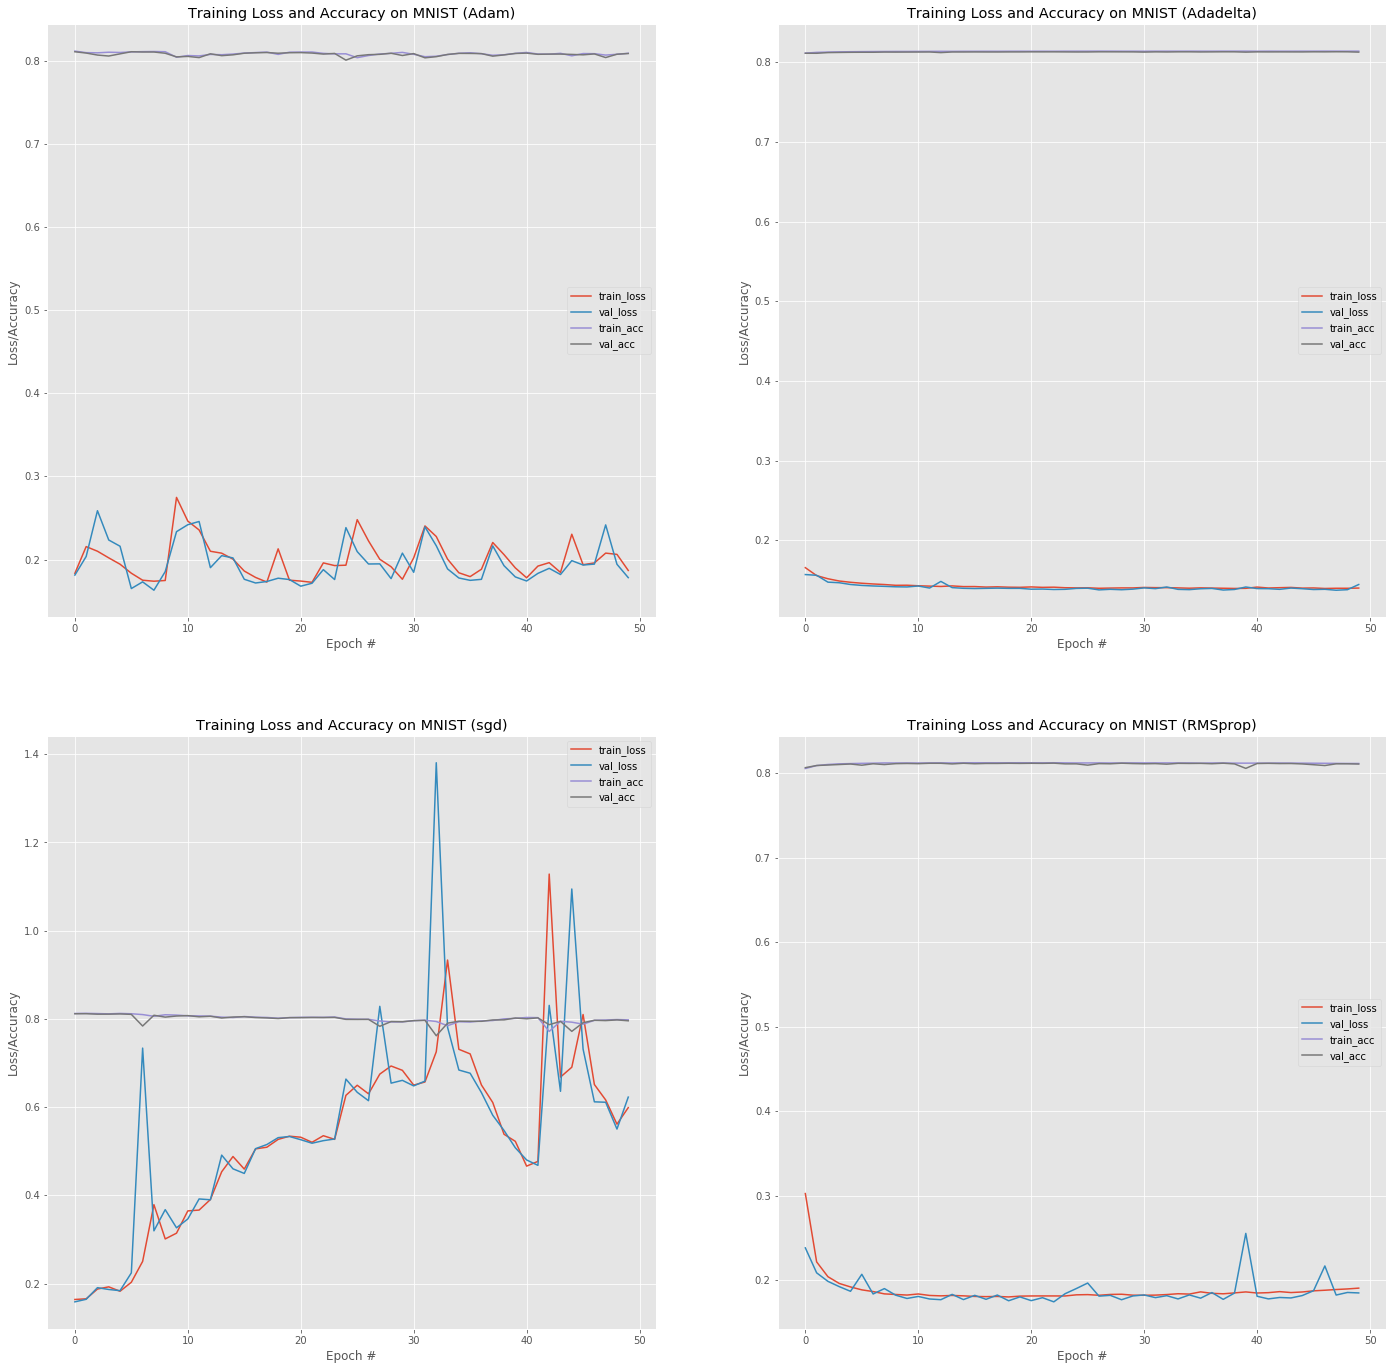

In [231]:
plt.style.use("ggplot")

fig = plt.figure(figsize=[24,24])
i=1
for key,value in H.items():
  print(i)
  h = H[key][0]
  print(H[key])
  title = H[key][1]
  print(title)
  EPOCHS = 50
  N = np.arange(0, EPOCHS)
  print(h.history["loss"])
  axs = plt.subplot(2,2,i)
  axs.plot(N, h.history["loss"], label="train_loss")
  axs.plot(N, h.history["val_loss"], label="val_loss") 
  axs.plot(N, h.history["acc"], label="train_acc")
  axs.plot(N, h.history["val_acc"], label="val_acc")
  axs.set_title(title)
  axs.set_xlabel("Epoch #")
  axs.set_ylabel("Loss/Accuracy")
  axs.legend()
  i+=1
  print(i)
  


  


In [234]:
os.getcwd()

'/content/drive/My Drive/Demonstration_of_Optimizers_in_Keras'

In [239]:
save_results_to = os.getcwd()
plt.savefig(save_results_to+"/"+"Different_Optimizers_for_50_eopchs_on_MNIST_Data_set.png")

<Figure size 432x288 with 0 Axes>